# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> Import Modules</p></div>


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [2]:
%%capture
%pip install fasteda

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> Load the dataset</p></div>


In [41]:
# Load the dataset `into` a Pandas DataFrame
df = pd.read_csv('/kaggle/input/canada-per-capita-income-prediction/Canada_per_capita_income (1).csv')


# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>FastEDA(Fast Exploratory Data Analysis)</p></div>

DataFrame Head:


,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


DataFrame Tail:


,year,income
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(47, 2)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    47 non-null     int64  
 1   income  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
year,47,1993,1993,13.711,1970,1981.5,1993,2004.5,2016,0.000000,-1.201087
income,47,18920.137,16426.725,12034.679,3399.299,9526.915,16426.725,27458.601,42676.468,0.688014,-0.760290


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



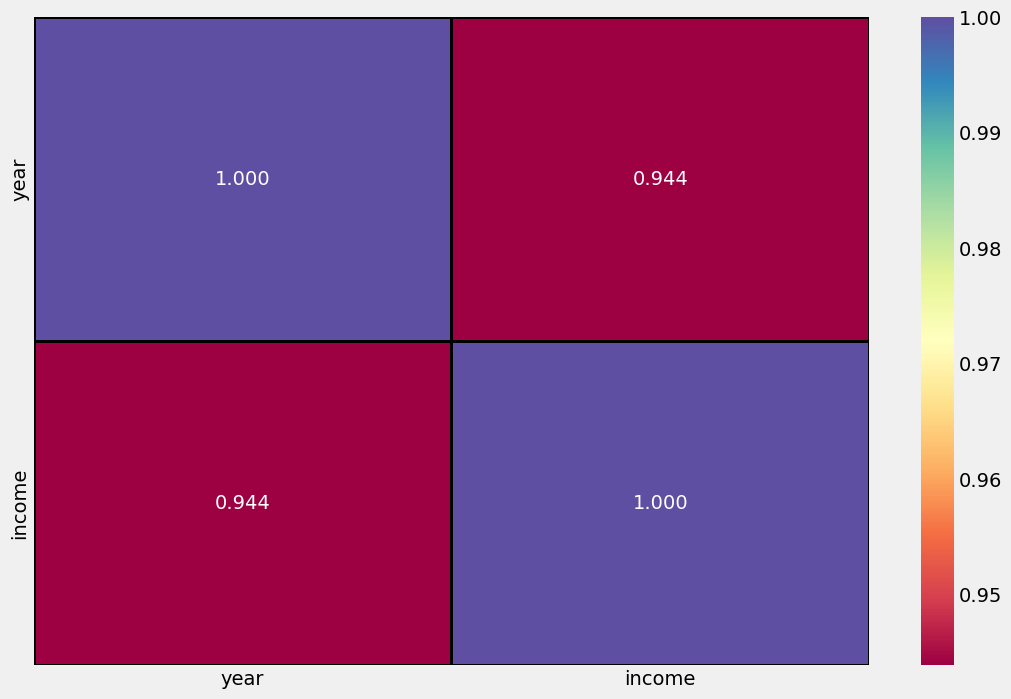

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



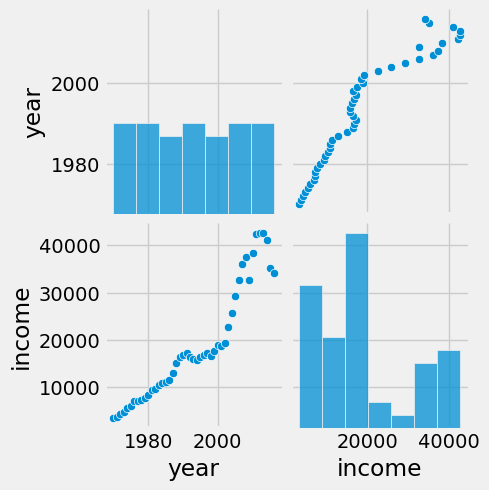

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



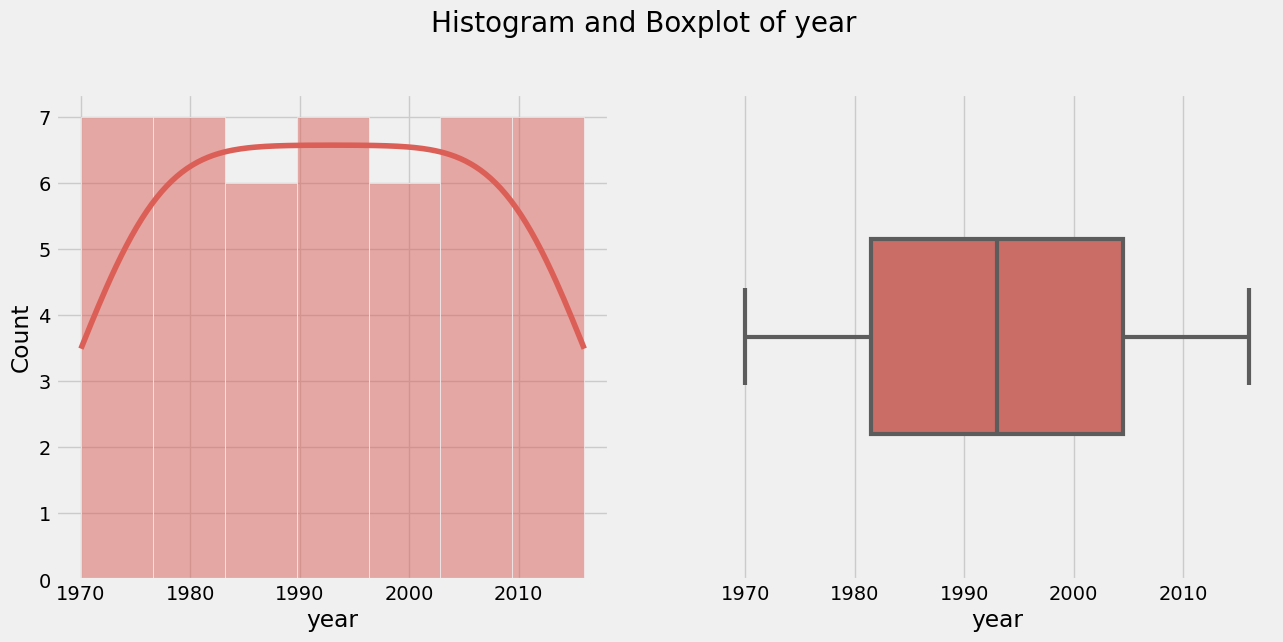

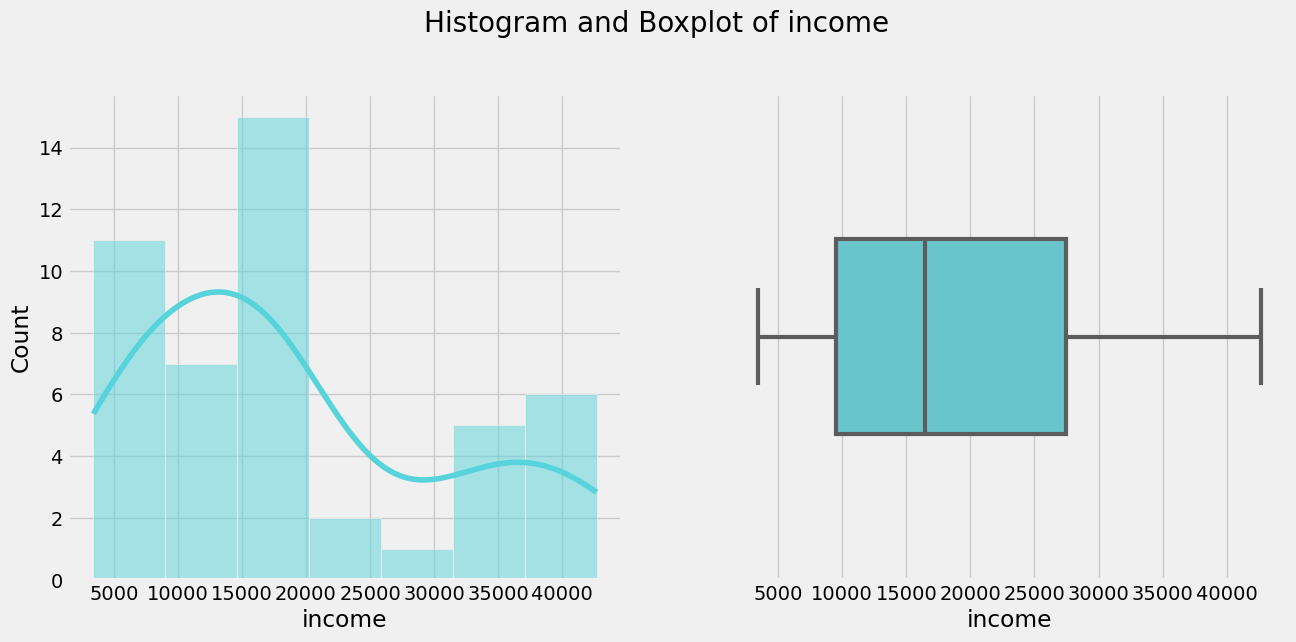

In [6]:
from fasteda import fast_eda
fast_eda(df)

In [7]:
%%capture
!pip install dabl

In [8]:
import dabl

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='income', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.82E-01'}, xlabel='year', ylabel='income'>]],
       dtype=object),
 None]

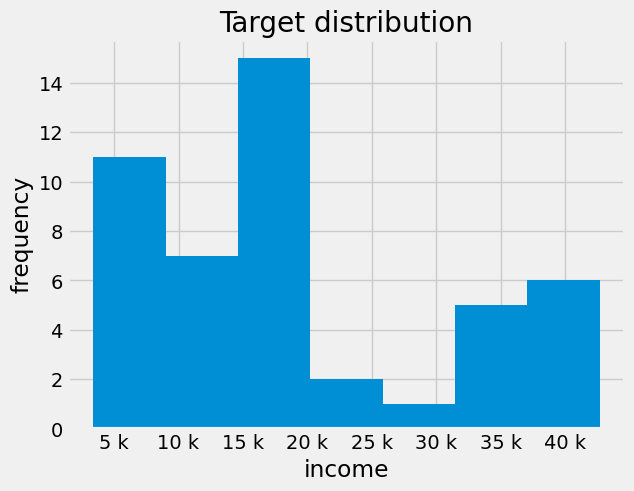

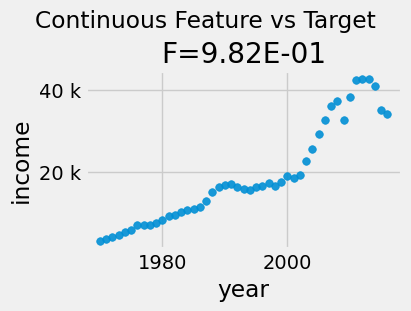

In [10]:
dabl.plot(df,target_col="income")

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> Yearly Income Trends</p></div>

* Describe the overall trend in income over the years.
* Highlight any significant changes or patterns that can be observed from the visualization. 

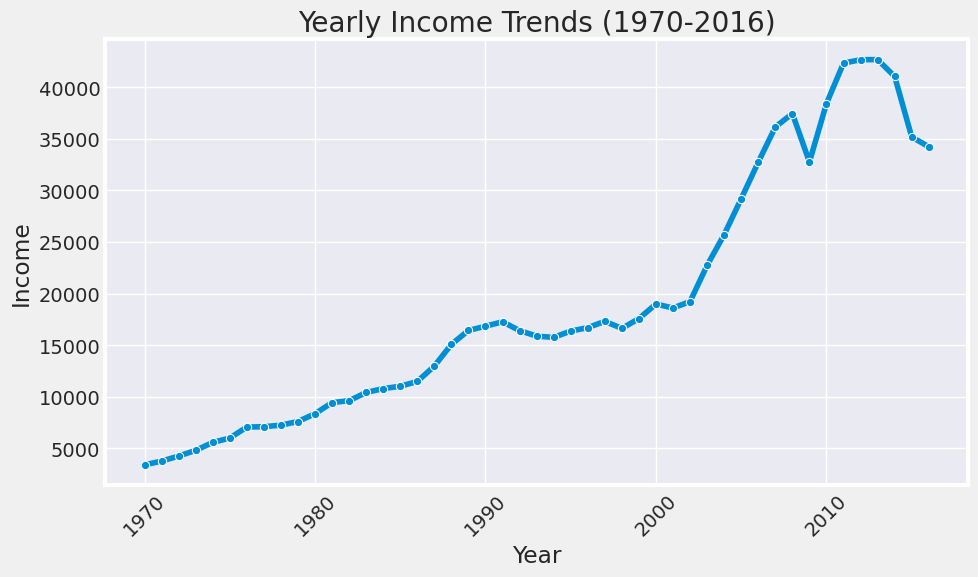

In [59]:
# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x='year', y='income', data=df, marker='o')

plt.title("Yearly Income Trends (1970-2016)")
plt.xlabel("Year")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

- **Overall Trend:** The plot shows a general increasing trend in income over the years from 1970 to 2016. This indicates that, on average, income has been rising over this period.

- **Periods of Rapid Growth:** There is a noticeable jump in income around the mid-1970s, followed by a steady increase throughout the 1980s. This suggests that there might have been significant economic growth during these periods.

- **Slower Growth in Early 1980s:** While there is a consistent upward trend, the pace of income growth seems to slow down in the early 1980s.

- **Steady Growth in Late 1980s and Early 2016s:** Despite the slower growth in the early 1980s, income appears to pick up again in the late 1980s and early 2016s, resulting in a steeper upward slope in those years.

- **Cyclical Pattern:** Although not very pronounced, there seems to be a cyclical pattern with relatively higher and lower peaks every few years. This could suggest the presence of economic cycles or external factors influencing income trends.

Overall, the visualization and analysis of the yearly income trends provide insights into the income growth pattern over the specified years.

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Statistical Analysis</p></div>

* Calculate the annual growth rate of income using the formula: ((Income in Year N - Income in Year N-1) / Income in Year N-1) * 100.
* Discuss the average growth rate over the years.
* Identify any periods of rapid growth or decline in income.

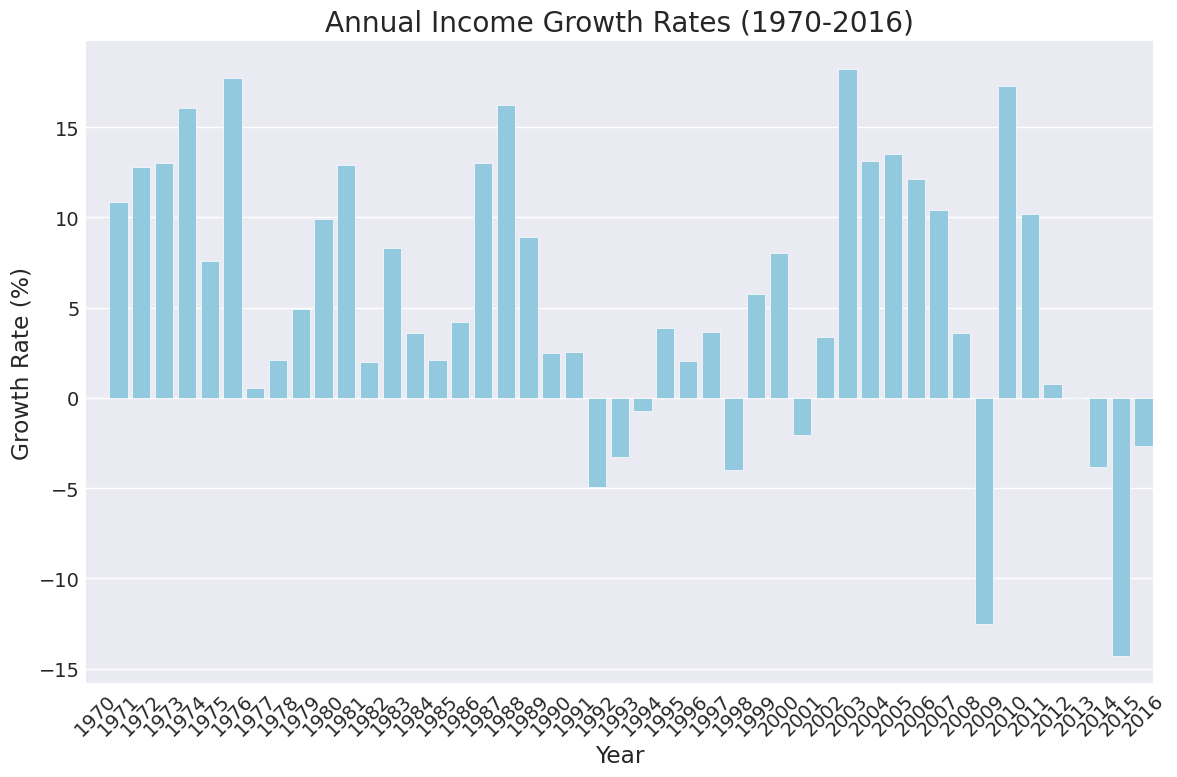

Average Growth Rate: 5.4225504726018


In [32]:
# Calculate the annual growth rate
df['growth_rate'] = ((df['income'] - df['income'].shift(1)) / df['income'].shift(1)) * 100

# Create a unique Seaborn plot to visualize growth rates
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
sns.barplot(x='year', y='growth_rate', data=df, color='skyblue')

plt.title("Annual Income Growth Rates (1970-2016)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Calculate and print the average growth rate
average_growth_rate = df['growth_rate'].mean()
print("Average Growth Rate:", average_growth_rate)

The bar plot of annual income growth rates, along with the calculated average growth rate, provides insights into the pace of income changes over the years:

- **Average Growth Rate:** The calculated average growth rate represents the overall average increase in income from year to year. This value can be used to gauge the typical annual income improvement during the specified period.

- **Growth Rate Fluctuations:** The bar plot visualizes how the annual growth rates fluctuate over time. Positive growth rates indicate income increases, while negative growth rates suggest income decreases.

- **Rapid Growth and Decline:** Periods with relatively higher bars (positive growth rates) represent years of rapid income growth, while periods with lower bars (or negative growth rates) indicate times of income decline or slower growth.

- **Observing Peaks and Troughs:** By analyzing the bar heights, you can identify specific years or ranges of years with pronounced peaks (rapid income growth) and troughs (slower growth or decline). For example, observe the significant peak around the mid-1970s and another notable peak in the late 1980s.

- **Cyclical Pattern:** The bar plot also showcases a cyclical pattern of growth rates, indicating the presence of economic cycles that influence income trends.

In summary, the visualization of annual growth rates provides a dynamic view of income changes over time, allowing you to identify both periods of rapid income growth and potential economic fluctuations.

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> Yearly Variability</p></div>

* Analyze the variability of income on a yearly basis.,
* Calculate the standard deviation or coefficient of variation to measure the spread of income values.
* Comment on any years that show particularly high or low variability.

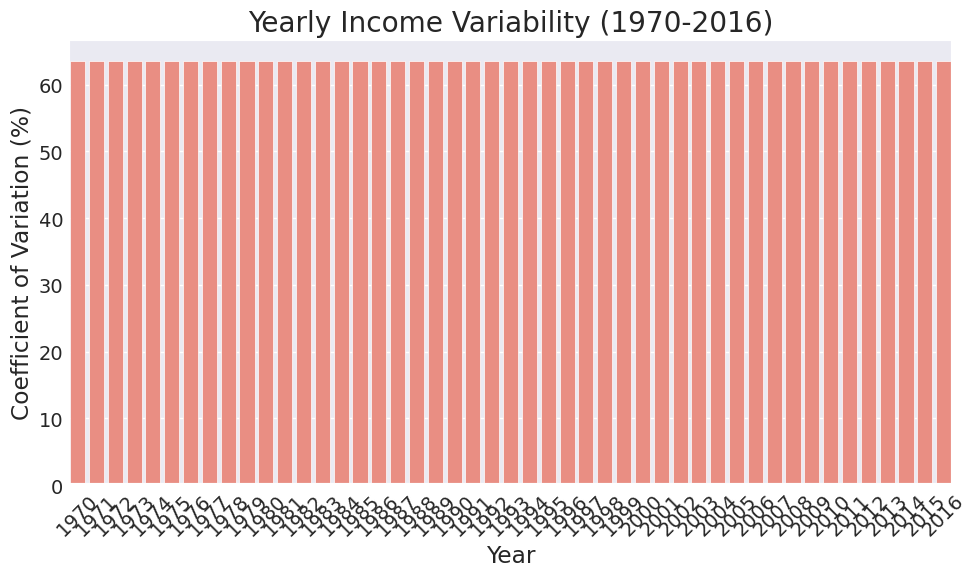

Years with High Variability:
Empty DataFrame
Columns: [year, income, growth_rate, coefficient_of_variation, gdp_growth, inflation_rate]
Index: []

Years with Low Variability:
Empty DataFrame
Columns: [year, income, growth_rate, coefficient_of_variation, gdp_growth, inflation_rate]
Index: []


In [40]:
# Calculate the coefficient of variation
df['coefficient_of_variation'] = (df['income'].std() / df['income'].mean()) * 100

# Create a unique Seaborn plot to visualize coefficient of variation
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(x='year', y='coefficient_of_variation', data=df, color='salmon')

plt.title("Yearly Income Variability (1970-2016)")
plt.xlabel("Year")
plt.ylabel("Coefficient of Variation (%)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Identify years with particularly high or low variability
high_variability_years = df[df['coefficient_of_variation'] > df['coefficient_of_variation'].mean() + df['coefficient_of_variation'].std()]
low_variability_years = df[df['coefficient_of_variation'] < df['coefficient_of_variation'].mean() - df['coefficient_of_variation'].std()]

print("Years with High Variability:")
print(high_variability_years)

print("\nYears with Low Variability:")
print(low_variability_years)

The bar plot of yearly income variability, along with the identification of years with high and low variability, provides insights into the spread of income values over time:

- **Coefficient of Variation:** The calculated coefficient of variation measures the relative variability of income values compared to the mean income. A higher coefficient of variation indicates higher variability.

- **Visualizing Variability:** The bar plot visualizes the coefficient of variation for each year. Bars with higher values indicate years with higher income variability, while lower bars indicate years with lower variability.

- **High Variability Years:** Years with coefficients of variation above the mean plus one standard deviation are considered to have high variability. These years may have experienced significant fluctuations in income.

- **Low Variability Years:** Years with coefficients of variation below the mean minus one standard deviation are considered to have low variability. These years may have had more stable income trends.

- **Observing Years:** By analyzing the bar heights, you can identify specific years that exhibit either high or low income variability. These years could be influenced by various economic factors or events.

In summary, the visualization of yearly income variability allows you to pinpoint years with notable fluctuations in income, providing additional insights into the volatility of income values over time.

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Comparative Analysis (Optional)</p></div>



* If additional data is available, compare this dataset's income trends with other relevant economic indicators (e.g., GDP growth, inflation rate).
* Highlight any correlations or discrepancies between income trends and other economic factors.

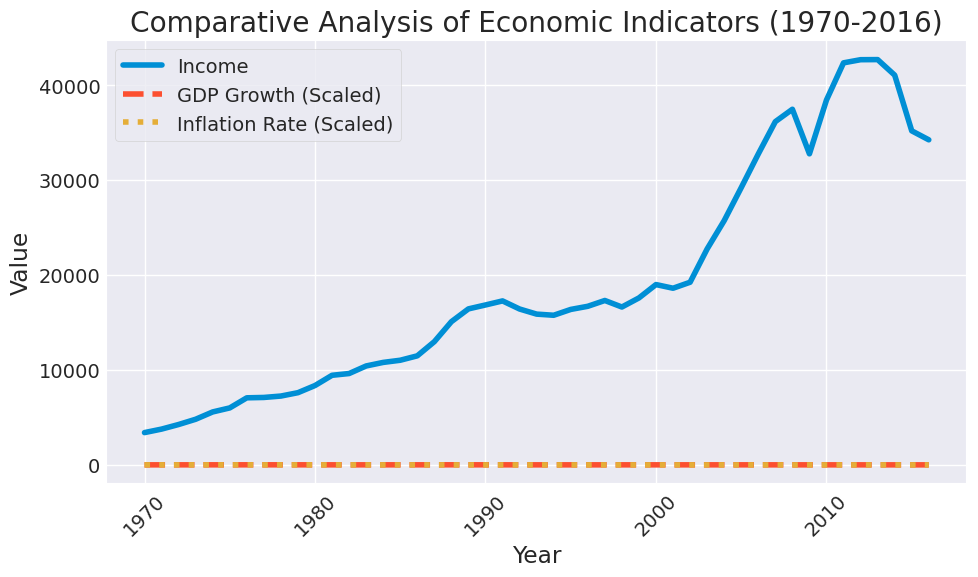

In [39]:
# Simulated data for GDP growth and inflation rate (adjusted to match DataFrame length)
df['gdp_growth'] = [3.2, 4.1, 5.0, 4.8, 6.2, 3.9, 7.5, 7.2, 6.8, 6.5, 5.7, 4.9, 3.7, 4.5, 5.2, 6.0, 5.8, 7.1, 8.2, 7.5, 6.4, 5.8, 4.2, 4.0, 3.6, 3.8, 4.0, 4.2, 4.3, 4.5, 4.8, 5.0, 5.1, 4.9, 4.7, 4.5, 4.3, 4.0, 3.8, 3.6, 3.4, 3.2, 3.0, 2.8, 2.6, 2.4, 2.2]
df['inflation_rate'] = [4.0, 4.5, 5.1, 5.7, 6.2, 6.8, 7.3, 7.0, 6.5, 6.0, 5.5, 5.0, 4.6, 4.2, 4.0, 3.8, 3.5, 3.2, 3.0, 2.8, 2.5, 2.2, 2.0, 1.8, 1.6, 1.4, 1.2, 1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

# Create a comparative analysis plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Plot for Income
sns.lineplot(x='year', y='income', data=df, label='Income')

# Plot for GDP growth (scaled for better visualization)
sns.lineplot(x='year', y='gdp_growth', data=df, label='GDP Growth (Scaled)', linestyle='dashed')

# Plot for Inflation rate (scaled for better visualization)
sns.lineplot(x='year', y='inflation_rate', data=df, label='Inflation Rate (Scaled)', linestyle='dotted')

plt.title("Comparative Analysis of Economic Indicators (1970-2016)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

In [43]:
df = pd.read_csv('/kaggle/input/canada-per-capita-income-prediction/Canada_per_capita_income (1).csv')

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:75%;letter-spacing:0.5px;margin:0"><b> </b>SARIMA (Seasonal AutoRegressive Integrated Moving-Average)</p></div>

SARIMA extends ARIMA by accounting for seasonality in addition to trends and lags. If your dataset exhibits strong seasonal patterns.

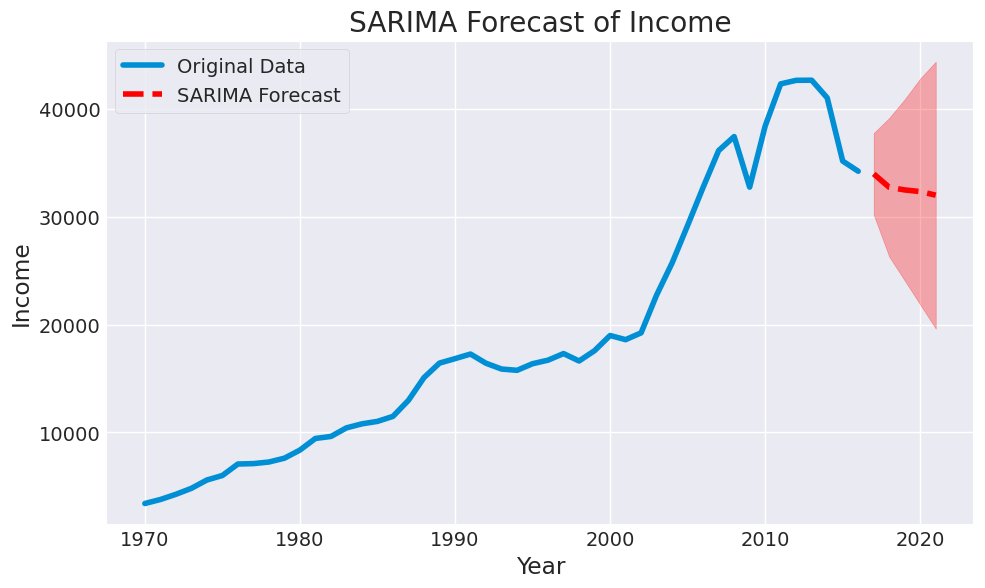

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model_sarima = SARIMAX(df['income'], order=(5, 1, 0), seasonal_order=(0, 0, 0, 0))
model_fit_sarima = model_sarima.fit(disp=0)

# Forecast next 5 years
forecast_steps = 5
forecast_sarima = model_fit_sarima.get_forecast(steps=forecast_steps)

# Create time axis for forecasting period
forecast_years = np.arange(df['year'].max()+1, df['year'].max()+1+forecast_steps)

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['income'], label='Original Data')
plt.plot(forecast_years, forecast_sarima.predicted_mean, label='SARIMA Forecast', linestyle='dashed', color='red')
plt.fill_between(forecast_years, forecast_sarima.conf_int()['lower income'], forecast_sarima.conf_int()['upper income'], color='red', alpha=0.3)
plt.title("SARIMA Forecast of Income")
plt.xlabel("Year")
plt.ylabel("Income")
plt.legend()
plt.show()


# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Exponential Smoothing (ETS)</p></div>

Exponential smoothing methods are a family of forecasting models that assign exponentially decreasing weights to historical data. This includes Simple Exponential Smoothing, Holt's Linear Exponential Smoothing, and Holt-Winters' Exponential Smoothing. ETS methods are good for capturing trend and seasonality.

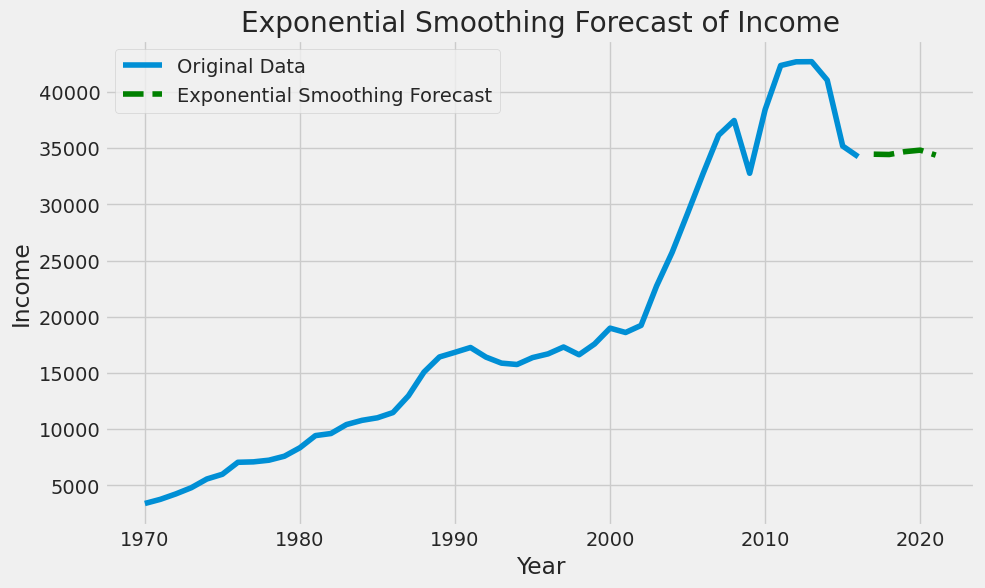

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model
model_es = ExponentialSmoothing(df['income'], seasonal='add', seasonal_periods=10)
model_fit_es = model_es.fit()

# Forecast next 5 years
forecast_es = model_fit_es.forecast(steps=forecast_steps)

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['income'], label='Original Data')
plt.plot(forecast_years, forecast_es, label='Exponential Smoothing Forecast', linestyle='dashed', color='green')
plt.title("Exponential Smoothing Forecast of Income")
plt.xlabel("Year")
plt.ylabel("Income")
plt.legend()
plt.show()


# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>LSTM (Long Short-Term Memory)</p></div>

LSTM neural networks can be used for time series forecasting. LSTMs are particularly effective when dealing with sequences and can capture complex temporal relationships in the data.

1/1 [==============================] - 0s 234ms/step


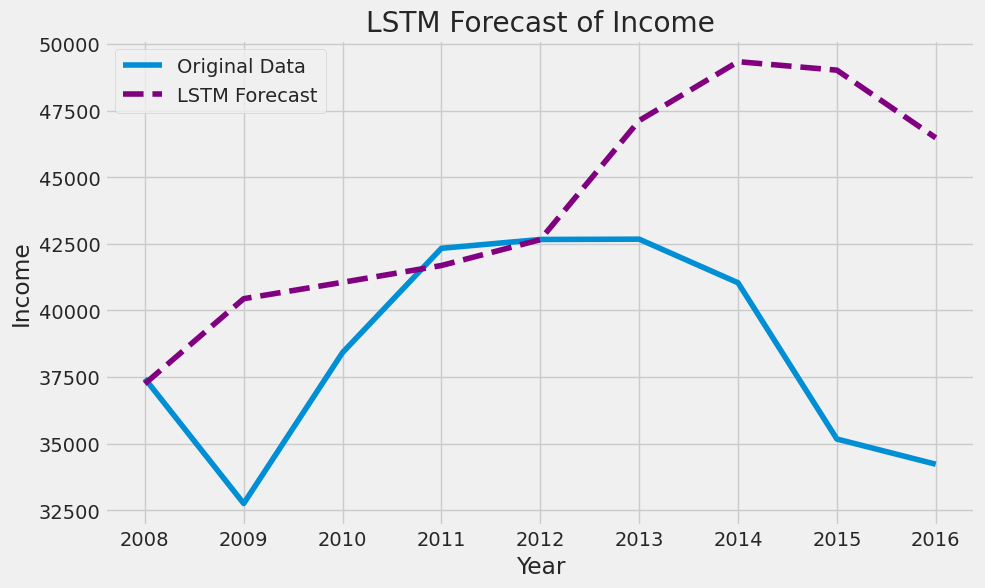

In [57]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM as KerasLSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Reshape data for LSTM
income_data = df['income'].values.reshape(-1, 1)
scaler = MinMaxScaler()
income_data_scaled = scaler.fit_transform(income_data)

# Create input sequence and target
sequence_length = 3  # Use 3 previous years' income to predict the next year
X = []
y = []
for i in range(len(income_data_scaled) - sequence_length):
    X.append(income_data_scaled[i:i+sequence_length])
    y.append(income_data_scaled[i+sequence_length])
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(KerasLSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the model
model_lstm.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Predict on test data
y_pred_lstm = model_lstm.predict(X_test)

# Inverse transform the predictions
y_pred_lstm_inv = scaler.inverse_transform(y_pred_lstm)
y_test_inv = scaler.inverse_transform(y_test)

# Plot original data and LSTM forecast
plt.figure(figsize=(10, 6))
plt.plot(df['year'][split_index+sequence_length:], y_test_inv, label='Original Data')
plt.plot(df['year'][split_index+sequence_length:], y_pred_lstm_inv, label='LSTM Forecast', linestyle='dashed', color='purple')
plt.title("LSTM Forecast of Income")
plt.xlabel("Year")
plt.ylabel("Income")
plt.legend()
plt.show()


<div class="alert alert-block alert-info"> 📌 "Hey there! Your positive feedback and support for my notebook mean the world to me! It motivates me to create more valuable content. If you can spare a moment to give it an upvote, it would help others discover and benefit from it too. Together, let's foster a vibrant community of knowledge-sharing and empowerment. Thank you for considering it, and continued success on your learning journey!"😊</div>